# MISP Data Analysis

Notebook used to generate basic metrics for data stored within the MISP platform

## Connect to MISP

In [54]:
from pymisp import PyMISP
import jmespath
import pandas as pd
import matplotlib.pyplot as plt

# MISP configuration
MISP_URL = 'https://localhost'
MISP_KEY = '53XxW3buXZsFqLm0Mqry8sGQCsNlSDfKfKmX7jei'

In [49]:
misp = PyMISP(MISP_URL, MISP_KEY, ssl=False)

/home/bikram/Git/cti-platform/orchestration/venv/lib64/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
The version of PyMISP recommended by the MISP instance (2.4.171) is newer than the one you're using now (2.4.170.2). Please upgrade PyMISP.
/home/bikram/Git/cti-platform/orchestration/venv/lib64/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/bikram/Git/cti-platform/orchestration/venv/lib64/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being 

## Get Events from MISP Database

In [50]:
events = misp.search()
tags = jmespath.search('[].Event.Tag[].name', events)

/home/bikram/Git/cti-platform/orchestration/venv/lib64/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


## Visualize Event Tags within a Bar Chart

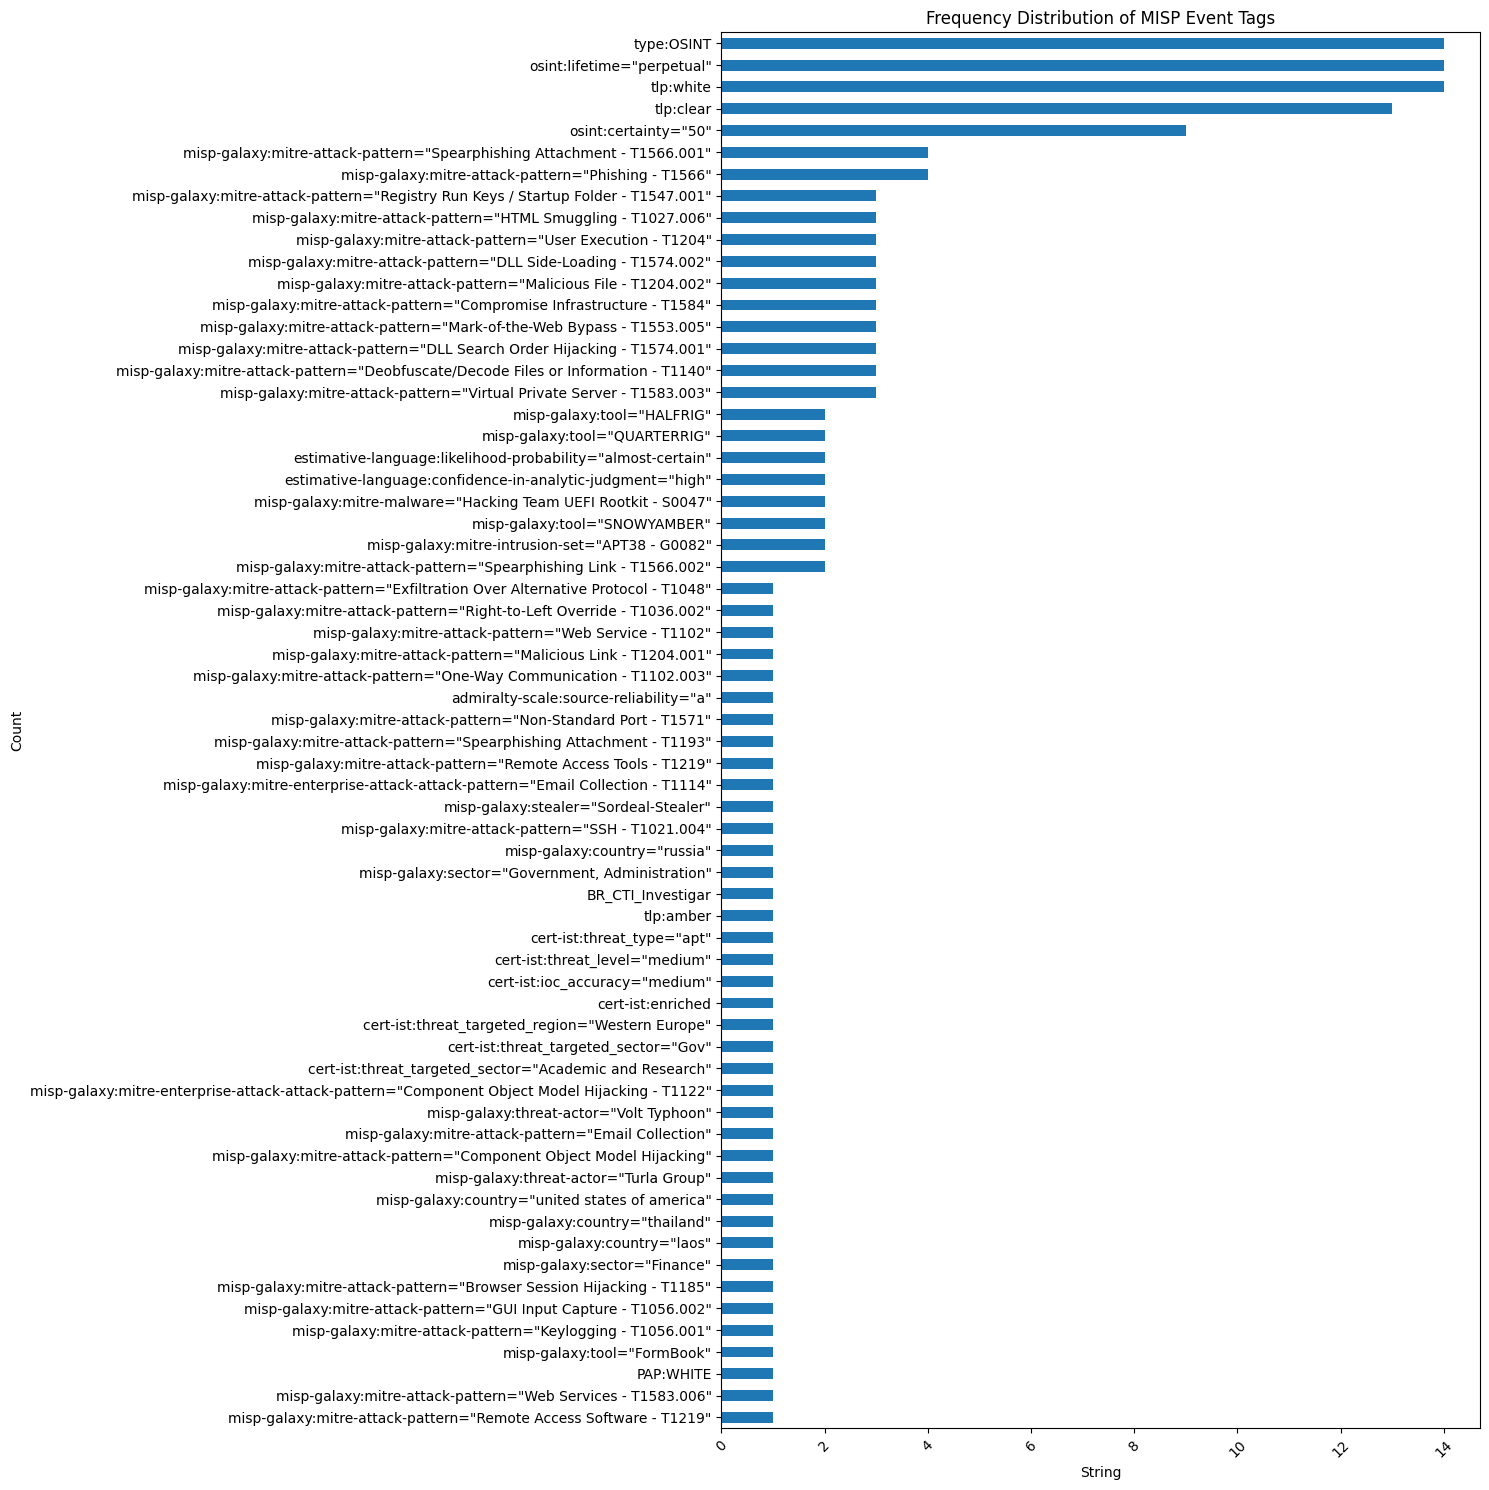

In [53]:
# Create a pandas Series from the list
string_series = pd.Series(tags)

# Count the occurrences of each string
string_counts = string_series.value_counts()

# Sort the string counts in descending order
sorted_counts = string_counts.sort_values(ascending=True)

# Create a bar plot to visualize the string frequencies
plt.figure(figsize=(15, 15))
sorted_counts.plot(kind='barh')
plt.title('Frequency Distribution of MISP Event Tags')
plt.xlabel('String')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Visualize Attribute Tags

In [77]:
attributes = misp.search(controller='attributes')
tags = jmespath.search('[].Attribute.Tag[].name', attributes)

/home/bikram/Git/cti-platform/orchestration/venv/lib64/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [78]:
for attribute in attributes['Attribute']:
    print(attribute)


{'id': '36', 'event_id': '6', 'object_id': '0', 'object_relation': None, 'category': 'Network activity', 'type': 'domain', 'to_ids': False, 'uuid': 'bb8bdc97-bfa6-4731-b376-d7c088038b5f', 'timestamp': '1686878626', 'distribution': '5', 'sharing_group_id': '0', 'comment': '', 'deleted': False, 'disable_correlation': False, 'first_seen': None, 'last_seen': None, 'value': 'bgdomaindne.net', 'Event': {'org_id': '1', 'distribution': '1', 'id': '6', 'info': 'Correlation Event 3', 'orgc_id': '1', 'uuid': '7443529f-1144-4339-a02e-34152ea88973'}}
{'id': '37', 'event_id': '6', 'object_id': '0', 'object_relation': None, 'category': 'Payload delivery', 'type': 'filename', 'to_ids': False, 'uuid': 'cdbc57ad-212b-4fbc-8f7a-ae10130beb58', 'timestamp': '1686878667', 'distribution': '5', 'sharing_group_id': '0', 'comment': '', 'deleted': False, 'disable_correlation': False, 'first_seen': None, 'last_seen': None, 'value': 'bgtest.exe', 'Event': {'org_id': '1', 'distribution': '1', 'id': '6', 'info': 'Co

In [82]:
tags = jmespath.search('[].Tag[].name', attributes['Attribute'])
tags

['misp-galaxy:mitre-intrusion-set="Dark Caracal - G0070"', 'BR_CTI_Investigar']

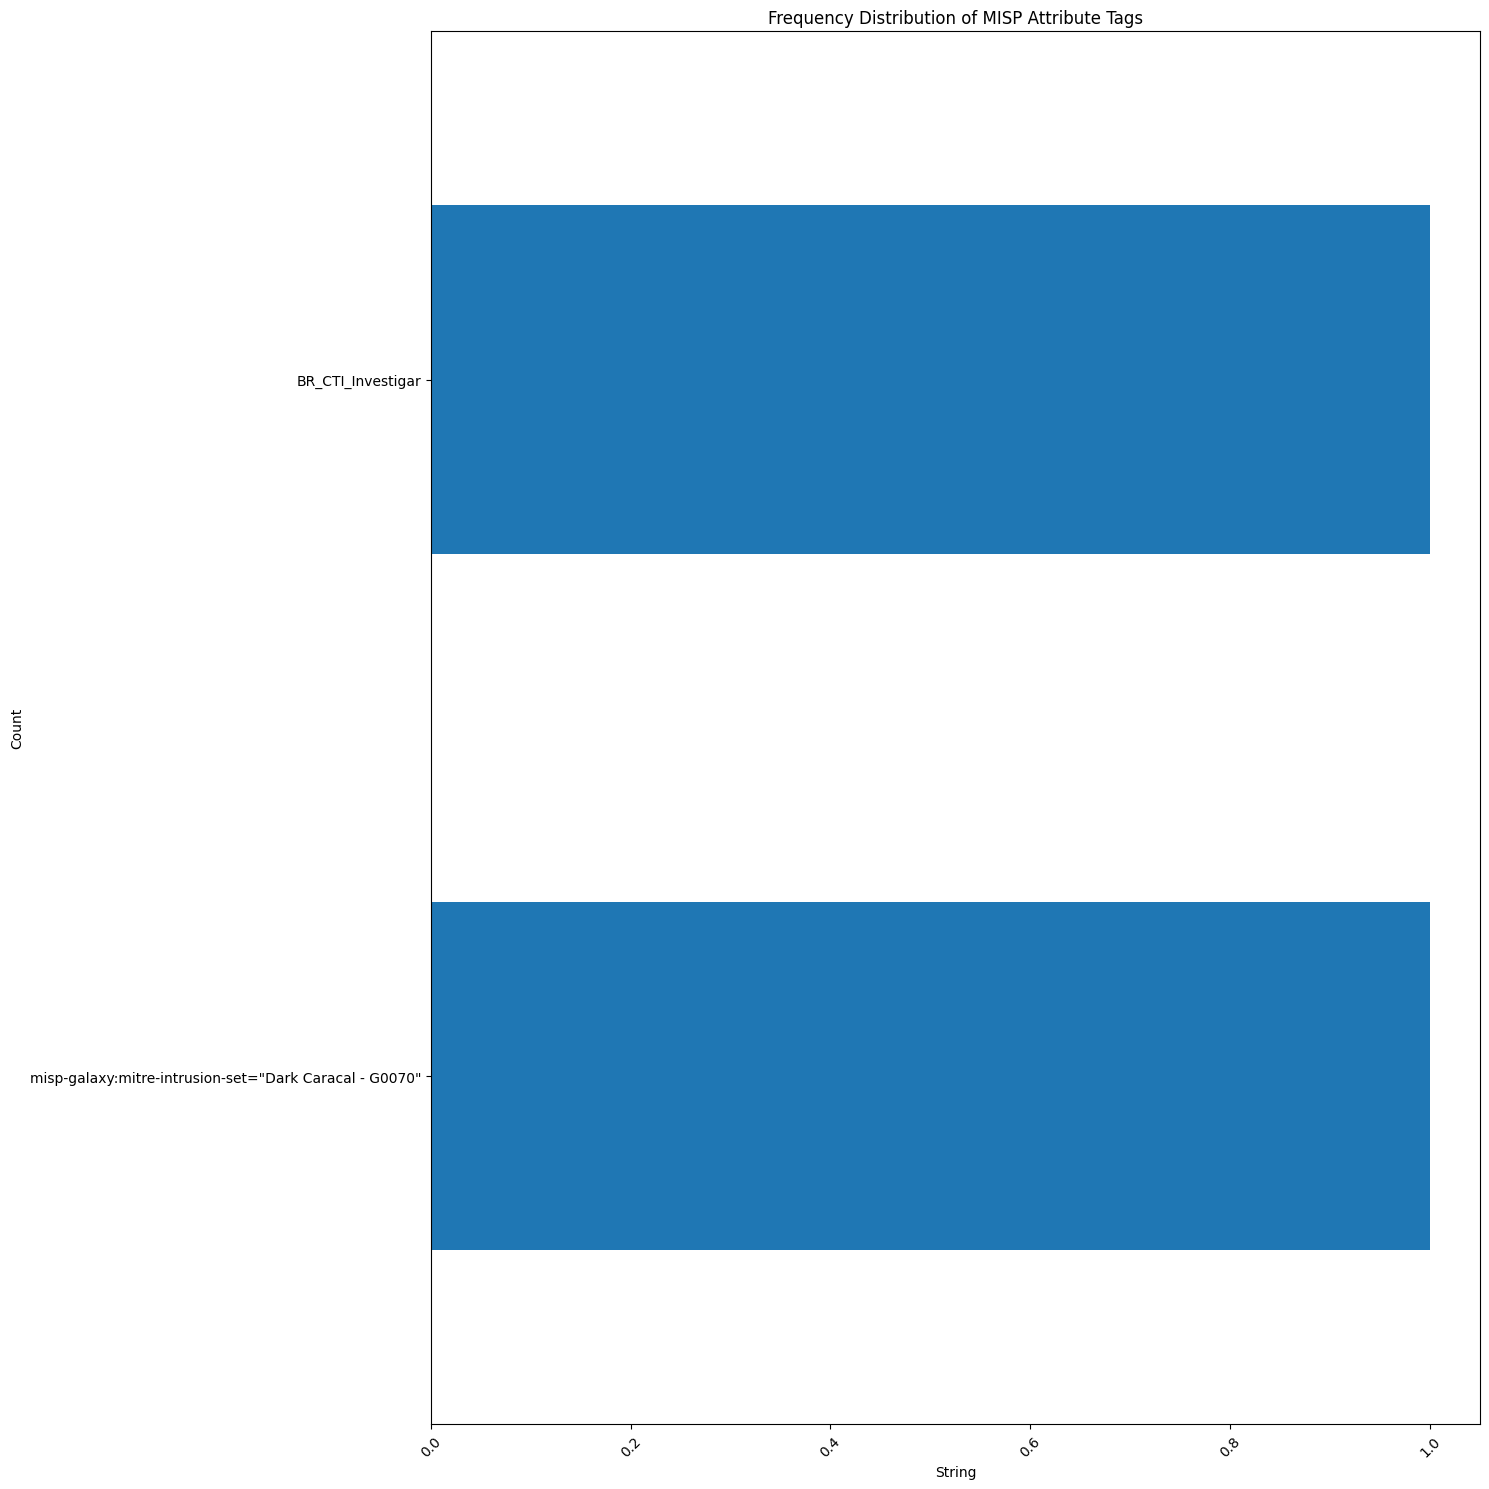

In [83]:
# Create a pandas Series from the list
string_series = pd.Series(tags)

# Count the occurrences of each string
string_counts = string_series.value_counts()

# Sort the string counts in descending order
sorted_counts = string_counts.sort_values(ascending=True)

# Create a bar plot to visualize the string frequencies
plt.figure(figsize=(15, 15))
sorted_counts.plot(kind='barh')
plt.title('Frequency Distribution of MISP Attribute Tags')
plt.xlabel('String')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()